## Light EDA

In [1]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates
import seaborn as sns

In [86]:
#data directory
data_dir = "/Users/gogo/Downloads/DSC180b/hchs/actigraphy"

In [87]:
df = pd.read_csv(os.path.join(data_dir, 'hchs-sol-sueno-00238589.csv'))
df = df[df.offwrist==0]

In [88]:
df.head()

,pid,sawa2,line,offwrist,activity,marker,whitelight,redlight,greenlight,bluelight,wake,interval,starth,day,dayofweek,validday,time
0,238589,1,1,0,NaN,0,NaN,NaN,NaN,NaN,NaN,ACTIVE,0,1,4,1,14:06:00
1,238589,1,2,0,NaN,0,NaN,NaN,NaN,NaN,NaN,ACTIVE,0,1,4,1,14:06:30
2,238589,1,3,0,NaN,0,NaN,NaN,NaN,NaN,NaN,ACTIVE,0,1,4,1,14:07:00
3,238589,1,4,0,NaN,0,NaN,NaN,NaN,NaN,NaN,ACTIVE,0,1,4,1,14:07:30
4,238589,1,5,0,234.0,0,311.93,42.2,24.6,3.07,NaN,ACTIVE,0,1,4,1,14:08:00


In [89]:
df.offwrist.unique()

array([0])

In [90]:
#check the range
print([df.whitelight.min(), df.whitelight.max()])
print([df.redlight.min(), df.redlight.max()])
print([df.greenlight.min(), df.greenlight.max()])
print([df.bluelight.min(), df.bluelight.max()])

[0.0, 3987.3]
[0.0, 192.0]
[0.0, 385.0]
[0.0, 176.0]


In [91]:
#preprocess the dataframe
df = df[df.validday == 1]
df['dt'] = pd.to_datetime(df['time'],format= '%H:%M:%S' )
df.time = df['dt'].dt.time
df = df.sort_values(by=['day', 'time'])

In [92]:
# df = df[df.whitelight!=0]

### The intensity of light of a day of a random patient

In [93]:
# light intensity throughout a day
# df[df.day==1].sort_values(by = ['time']).plot.line(x='time',y='whitelight')
d1 = df[df.day==1].sort_values(by = ['time'])

In [94]:
# # d1.plot.line(x='time', subplots=True,
# #              color={"whitelight": "black", "redlight": "red", 'bluelight':'blue', 'greenlight':'green'})
# fig, axs = plt.subplots(4,1)
# axs[0] = plt.plot(d1.time, d1.whitelight, 'tab:gray')
# axs[0].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M:%S'))
# axs[1] = plt.plot(d1.time,d1.redlight, 'r')
# # axs[1].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M:%S'))
# axs[2] = plt.plot(d1.time,d1.bluelight, 'b')
# # axs[2].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M:%S'))
# axs[3] = plt.plot(d1.time,d1.greenlight, 'g')
# # axs[3].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M:%S'))



<AxesSubplot:xlabel='time'>

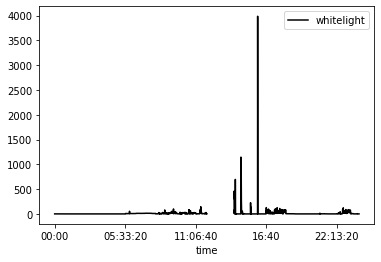

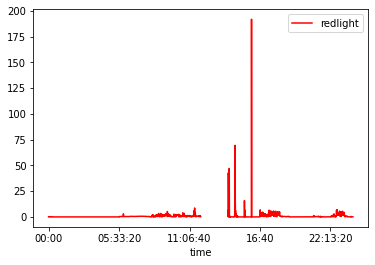

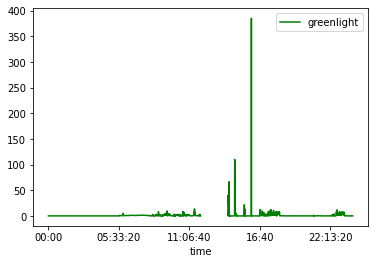

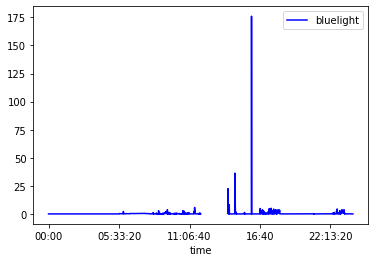

In [95]:
# average through the week
d1.plot.line(x='time', y ='whitelight', color='black')
d1.plot.line(x='time', y ='redlight', color='red')
d1.plot.line(x='time', y ='greenlight', color='green')
d1.plot.line(x='time', y ='bluelight', color='blue')

### average through a week

In [96]:
w = df[['whitelight', 'redlight', 'greenlight','bluelight','time']].groupby(['time']).mean()
w.head()

,whitelight,redlight,greenlight,bluelight
time,,,,
00:00:00,6.302857,0.859186,0.455271,0.382414
00:00:30,14.922857,0.807214,1.436543,0.511357
00:01:00,20.295714,1.163686,1.939129,0.729986
00:01:30,13.297143,0.765243,1.270557,0.436057
00:02:00,12.752857,0.758971,1.215057,0.409129


array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

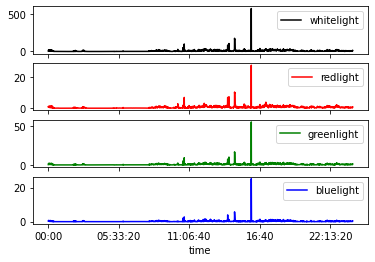

In [97]:
w.plot.line(subplots=True, color={'whitelight':'black', 'redlight':'red', 'greenlight':'green', 'bluelight':'blue'})
# w.whitelight.plot(color='black')
# w.redlight.plot(color='red')
# w.greenlight.plot(color='green')
# w.bluelight.plot(color='blue')

# w.plot.line(x='time', y ='whitelight', color='black')
# w.plot.line(x='time', y ='redlight', color='red')
# w.plot.line(x='time', y ='greenlight', color='green')
# w.plot.line(x='time', y ='bluelight', color='blue')

### wake time

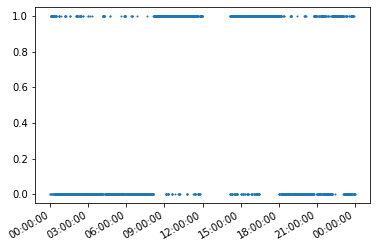

In [103]:
fig,ax = plt.subplots()
ax.scatter(d1.dt, d1.wake,s=1)
myFmt = matplotlib.dates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

### Average through patients


In [99]:
# directory = os.fsencode(data_dir)
dfs = []
counter = 0
for f in os.listdir(data_dir):
    df = pd.read_csv(os.path.join(data_dir,f))
    dfs.append(df)
    counter+=1
    if counter >=5:
        break

In [100]:
five_patients = pd.concat(dfs)
five_patients = five_patients[five_patients.offwrist==0]
five_patients = five_patients[five_patients.validday == 1]
five_patients.time = pd.to_datetime(five_patients['time'],format= '%H:%M:%S' ).dt.time
five_patients = five_patients.sort_values(by=['day', 'time'])
five_patients.head()


,pid,sawa2,line,offwrist,activity,marker,whitelight,redlight,greenlight,bluelight,wake,interval,starth,day,dayofweek,validday,time
1482,557750,1,1483,0,0.0,0.0,0.27,0.0215,0.0251,0.0023,0.0,REST-S,0,1,5,1,00:00:00
1474,60036754,1,1475,0,0.0,0.0,0.02,0.0049,0.0000,0.0059,0.0,REST-S,0,1,5,1,00:00:00
1430,7124288,1,1431,0,0.0,0.0,0.26,0.0170,0.0251,0.0023,0.0,REST-S,0,1,5,1,00:00:00
1670,52685373,1,1671,0,0.0,0.0,0.19,0.0128,0.0173,0.0059,0.0,REST-S,0,1,6,1,00:00:00
1483,557750,1,1484,0,0.0,0.0,0.27,0.0215,0.0251,0.0023,0.0,REST-S,0,1,5,1,00:00:30


array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

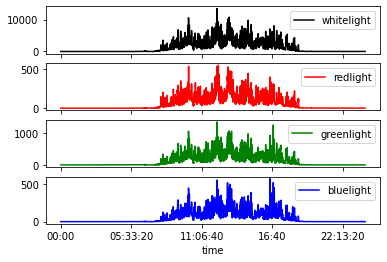

In [102]:
light_avg = five_patients[['whitelight', 'redlight', 'greenlight','bluelight','time']].groupby(['time']).mean()
light_avg.plot.line(subplots=True, color={'whitelight':'black', 'redlight':'red', 'greenlight':'green', 'bluelight':'blue'})